<center>
<img src="https://habrastorage.org/web/677/8e1/337/6778e1337c3d4b159d7e99df94227cb2.jpg"/>
## Специализация "Машинное обучение и анализ данных"
</center>
<center>Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий

# <center> Capstone проект №1. Идентификация пользователей по посещенным веб-страницам
<img src='http://i.istockimg.com/file_thumbview_approve/21546327/5/stock-illustration-21546327-identification-de-l-utilisateur.jpg'>

# <center>Неделя 2. Подготовка и первичный анализ данных

На второй неделе мы продолжим подготавливать данные для дальнейшего анализа и построения прогнозных моделей. Конкретно, раньше мы определили что сессия – это последовательность из 10 посещенных пользователем сайтов, теперь сделаем длину сессии параметром, и потом при обучении прогнозных моделей выберем лучшую длину сессии.
Также мы познакомимся с предобработанными данными и статистически проверим первые гипотезы, связанные с нашими наблюдениями. 

**План 2 недели:**
 - Часть 1. Подготовка нескольких обучающих выборок для сравнения
 - Часть 2. Первичный анализ данных, проверка гипотез

**В этой части проекта Вам могут быть полезны  следующие видеозаписи лекций курса "Построение выводов по данным":**

   - [Доверительные интервалы для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/3oi53/dovieritiel-nyie-intiervaly-dlia-doli)
   - [Биномиальный критерий для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/JwmBw/binomial-nyi-kritierii-dlia-doli)
   - [Доверительные интервалы на основе бутстрепа](https://www.coursera.org/learn/stats-for-data-analysis/lecture/GZjW7/dovieritiel-nyie-intiervaly-na-osnovie-butstriepa)
   
**Кроме того, в задании будут использоваться библиотеки Python [glob](https://docs.python.org/3/library/glob.html), [pickle](https://docs.python.org/2/library/pickle.html), [itertools](https://docs.python.org/3/library/itertools.html) и класс [csr_matrix](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html) из scipy.sparse.**

<font color='red'>**Задание:**</font> заполните код в этой тетрадке и выберите ответы в [веб-форме](https://docs.google.com/forms/d/13ZnT7w7foHD0uw0ynTtj7atdiCGvlltF8ThhbJCvLsc). 


## Часть 1. Подготовка нескольких обучающих выборок для сравнения

Пока мы брали последовательности из 10 сайтов, и это было наобум. Давайте сделаем число сайтов в сессии параметром, чтоб в дальнейшем сравнить модели классификации, обученные на разных выборках – с 5, 7, 10 и 15 сайтами в сессии. Более того, пока мы брали по 10 сайтов подряд, без пересечения. Теперь давайте применим идею скользящего окна – сессии будут перекрываться. 

**Пример**: для длины сессии 10 и ширины окна 7 файл из 30 записей породит не 3 сессии, как раньше (1-10, 11-20, 21-30), а 5 (1-10, 8-17, 15-24, 22-30, 29-30). При этом в предпоследней сессии будет один ноль, а в последней – 8 нолей.

Создадим несколько выборок для разных сочетаний параметров длины сессии и ширины окна. Все они представлены в табличке ниже:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e">session_length -&gt;<br>window_size <br></th>
    <th class="tg-031e">5</th>
    <th class="tg-031e">7</th>
    <th class="tg-031e">10</th>
    <th class="tg-031e">15</th>
  </tr>
  <tr>
    <td class="tg-031e">5</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">7</td>
    <td class="tg-031e"></td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">10</td>
    <td class="tg-031e"></td>
    <td class="tg-031e"></td>
    <td class="tg-031e"><font color='green'>v</font></td>
    <td class="tg-031e">v</td>
  </tr>
</table>

Итого должно получиться 18 разреженных матриц – указанные в таблице 9 сочетаний параметров формирования сессий для выборок из 10 и 150 пользователей. При этом 2 выборки мы уже сделали в прошлой части, они соответствуют сочетанию параметров: session_length=10, window_size=10, которые помечены в таблице выше галочкой зеленого цвета (done).

Реализуйте функцию *prepare_sparse_train_set_window*.

Аргументы:
- *path_to_csv_files* – путь к каталогу с csv-файлами
- *site_freq_path* – путь к pickle-файлу с частотным словарем, полученным в 1 части проекта
- *session_length* – длина сессии (параметр)
- *window_size* – ширина окна (параметр) 

Функция должна возвращать 2 объекта:
- разреженную матрицу *X_sparse* (двухмерная Scipy.sparse.csr_matrix), в которой строки соответствуют сессиям из *session_length* сайтов, а *max(site_id)* столбцов – количеству посещений *site_id* в сессии. 
- вектор *y* (Numpy array) "ответов" в виде ID пользователей, которым принадлежат сессии из *X_sparse*

Детали:
- Модифицируйте созданную в 1 части функцию *prepare_train_set*
- Некоторые сессии могут повторяться – оставьте как есть, не удаляйте дубликаты
- Замеряйте время выполнения итераций цикла с помощью *time* из *time*, *tqdm* из *tqdm* или с помощью виджета [log_progress](https://github.com/alexanderkuk/log-progress) ([статья](https://habrahabr.ru/post/276725/) о нем на Хабрахабре)
- 150 файлов из *capstone_websites_data/150users/* должны обрабатываться за несколько секунд (в зависимости от входных параметров). Если дольше – не страшно, но знайте, что функцию можно ускорить. 

In [3]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
from glob import glob
import os
import pickle
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from scipy import stats
from statsmodels.stats.proportion import proportion_confint
%matplotlib inline
from matplotlib import pyplot as plt

In [4]:
# Поменяйте на свой путь к данным
PATH_TO_DATA = 'capstone_user_identification'

In [18]:
from collections import Counter
import glob
from IPython.display import display

def buildSparseMatrix(X):
    rows = np.array([[e] * X.shape[1] for e in range(X.shape[0])]).flatten()
    cols = X.flatten()
    c = Counter()
    c.update(zip(rows, cols))
    row = [k[0] for k, v in sorted(c.items()) if k[1] != 0]
    col = [(k[1] - 1) for k, v in sorted(c.items()) if k[1] != 0]
    data = [v for k, v in sorted(c.items()) if k[1] != 0]
    X_sparse = csr_matrix((data, (row, col)))
    return X_sparse

def prepare_sparse_train_set_window(path_to_csv_files, site_freq_path, 
                                    session_length=10, window_size=10):
    ''' ВАШ КОД ЗДЕСЬ'''
    with open(site_freq_path, 'rb') as fin:
        site_dict = pickle.load(fin)
    
    site_chains = []
    for e in tqdm_notebook(glob.glob(os.path.join(path_to_csv_files, '*.csv'))):
        user_id = int(e.split('\\')[-1].split('user')[1][:-4])
        df = pd.read_csv(e)
        df['siteId'] = df['site'].apply(lambda x: site_dict[x][0])
        sites = df['siteId'].tolist()
        site_chain = []
        n_chains = 0
        #display(df)
        for i, siteId in enumerate(sites + [-1] * (session_length - 1)):
            if siteId != -1:
                site_chain.append(siteId)
            if (i + 1 - session_length) >= 0 and (i + 1 - session_length) % window_size == 0:
                cur_site_chain = site_chain[(i + 1 - session_length):]
                if len(cur_site_chain) != session_length:
                    cur_site_chain += [0] * (session_length - len(cur_site_chain))
                #print(i, cur_site_chain)
                site_chains.append(cur_site_chain + [user_id])
                n_chains += 1
        print(e, user_id, n_chains)
    data = pd.DataFrame(site_chains, columns = ['site_' + str(e + 1) for e in range(session_length)] + ['user_id'])
    X, y = data.iloc[:, :-1].values, data.iloc[:, -1].values        
    #print(X) 
    return buildSparseMatrix(X), y


**Примените полученную функцию с параметрами *session_length=5* и *window_size=3* к игрушечному примеру. Убедитесь, что все работает как надо.**

In [22]:
X_toy_s5_w3, y_s5_w3 = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA,'3users'), 
                                                       os.path.join(PATH_TO_DATA,'site_freq_3users.pkl'),
                                       session_length=5, window_size=3)

capstone_user_identification\3users\user0001.csv 1 5
capstone_user_identification\3users\user0002.csv 2 2
capstone_user_identification\3users\user0003.csv 3 5



In [23]:
X_toy_s5_w3.todense(), y_s5_w3

(matrix([[1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
         [1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
         [1, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
         [1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
         [0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0],
         [0, 1, 0, 3, 0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1],
         [0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32),
 array([1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3], dtype=int64))

In [24]:
X_toy_s5_w3.todense()

matrix([[1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
        [1, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 3, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [25]:
y_s5_w3

array([1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3], dtype=int64)

**Запустите созданную функцию 16 раз с помощью циклов по числу пользователей num_users (10 или 150), значениям параметра *session_length* (15, 10, 7 или 5) и значениям параметра *window_size* (10, 7 или 5). Сериализуйте все 16 разреженных матриц (обучающие выборки) и векторов (метки целевого класса – ID пользователя) в файлы `X_sparse_{num_users}users_s{session_length}_w{window_size}.pkl` и `y_{num_users}users_s{session_length}_w{window_size}.pkl`.**

**Чтоб убедиться, что мы все далее будем работать с идентичными объектами, запишите в список *data_lengths* число строк во всех полученных рареженных матрицах (16 значений). Если какие-то будут совпадать, это нормально (можно сообразить, почему).**

**На моем ноутбуке этот участок кода отработал за 26 секунд, хотя понятно, что все зависит от эффективности реализации функции *prepare_sparse_train_set_window* и мощности используемого железа. И честно говоря, моя первая реализация была намного менее эффективной (34 минуты), так что тут у Вас есть возможность оптимизировать свой код.**

In [27]:
%%time
import itertools

data_lengths = []

for num_users in [10, 150]:
    for window_size, session_length in itertools.product([10, 7, 5], [15, 10, 7, 5]):
        if window_size <= session_length and (window_size, session_length) != (10, 10):
            ''' ВАШ КОД ЗДЕСЬ '''
            X_sparse, y = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA,'{}users'.format(num_users)), 
                                                       os.path.join(PATH_TO_DATA,'site_freq_{}users.pkl'.format(num_users)),
                                       session_length=session_length, window_size=window_size)
            
            with open(os.path.join(PATH_TO_DATA, 
                                   'X_sparse_{}users_s{}_w{}.pkl'.format(num_users, session_length, window_size)), 'wb') as X_pkl:
                pickle.dump(X_sparse, X_pkl, protocol=2)
            with open(os.path.join(PATH_TO_DATA, 
                                   'y_sparse_{}users_s{}_w{}.pkl'.format(num_users, session_length, window_size)), 'wb') as y_pkl:
                pickle.dump(y, y_pkl, protocol=2)           
            
            data_lengths.append(X_sparse.shape[0])

capstone_user_identification\10users\user0031.csv 31 760
capstone_user_identification\10users\user0033.csv 33 1022
capstone_user_identification\10users\user0039.csv 39 2204
capstone_user_identification\10users\user0050.csv 50 802
capstone_user_identification\10users\user0100.csv 100 720
capstone_user_identification\10users\user0127.csv 127 1712
capstone_user_identification\10users\user0128.csv 128 2796
capstone_user_identification\10users\user0207.csv 207 1868
capstone_user_identification\10users\user0237.csv 237 1643
capstone_user_identification\10users\user0241.csv 241 534



capstone_user_identification\10users\user0031.csv 31 1086
capstone_user_identification\10users\user0033.csv 33 1460
capstone_user_identification\10users\user0039.csv 39 3148
capstone_user_identification\10users\user0050.csv 50 1146
capstone_user_identification\10users\user0100.csv 100 1029
capstone_user_identification\10users\user0127.csv 127 2446
capstone_user_identification\10users\user0128.csv 128 3995
capstone_user_identification\10users\user0207.csv 207 2668
capstone_user_identification\10users\user0237.csv 237 2347
capstone_user_identification\10users\user0241.csv 241 762



capstone_user_identification\10users\user0031.csv 31 1086
capstone_user_identification\10users\user0033.csv 33 1460
capstone_user_identification\10users\user0039.csv 39 3148
capstone_user_identification\10users\user0050.csv 50 1146
capstone_user_identification\10users\user0100.csv 100 1029
capstone_user_identification\10users\user0127.csv 127 2446
capstone_user_identification\10users\user0128.csv 128 3995
capstone_user_identification\10users\user0207.csv 207 2668
capstone_user_identification\10users\user0237.csv 237 2347
capstone_user_identification\10users\user0241.csv 241 762



capstone_user_identification\10users\user0031.csv 31 1086
capstone_user_identification\10users\user0033.csv 33 1460
capstone_user_identification\10users\user0039.csv 39 3148
capstone_user_identification\10users\user0050.csv 50 1146
capstone_user_identification\10users\user0100.csv 100 1029
capstone_user_identification\10users\user0127.csv 127 2446
capstone_user_identification\10users\user0128.csv 128 3995
capstone_user_identification\10users\user0207.csv 207 2668
capstone_user_identification\10users\user0237.csv 237 2347
capstone_user_identification\10users\user0241.csv 241 762



capstone_user_identification\10users\user0031.csv 31 1520
capstone_user_identification\10users\user0033.csv 33 2043
capstone_user_identification\10users\user0039.csv 39 4407
capstone_user_identification\10users\user0050.csv 50 1604
capstone_user_identification\10users\user0100.csv 100 1440
capstone_user_identification\10users\user0127.csv 127 3424
capstone_user_identification\10users\user0128.csv 128 5592
capstone_user_identification\10users\user0207.csv 207 3735
capstone_user_identification\10users\user0237.csv 237 3286
capstone_user_identification\10users\user0241.csv 241 1067



capstone_user_identification\10users\user0031.csv 31 1520
capstone_user_identification\10users\user0033.csv 33 2043
capstone_user_identification\10users\user0039.csv 39 4407
capstone_user_identification\10users\user0050.csv 50 1604
capstone_user_identification\10users\user0100.csv 100 1440
capstone_user_identification\10users\user0127.csv 127 3424
capstone_user_identification\10users\user0128.csv 128 5592
capstone_user_identification\10users\user0207.csv 207 3735
capstone_user_identification\10users\user0237.csv 237 3286
capstone_user_identification\10users\user0241.csv 241 1067



capstone_user_identification\10users\user0031.csv 31 1520
capstone_user_identification\10users\user0033.csv 33 2043
capstone_user_identification\10users\user0039.csv 39 4407
capstone_user_identification\10users\user0050.csv 50 1604
capstone_user_identification\10users\user0100.csv 100 1440
capstone_user_identification\10users\user0127.csv 127 3424
capstone_user_identification\10users\user0128.csv 128 5592
capstone_user_identification\10users\user0207.csv 207 3735
capstone_user_identification\10users\user0237.csv 237 3286
capstone_user_identification\10users\user0241.csv 241 1067



capstone_user_identification\10users\user0031.csv 31 1520
capstone_user_identification\10users\user0033.csv 33 2043
capstone_user_identification\10users\user0039.csv 39 4407
capstone_user_identification\10users\user0050.csv 50 1604
capstone_user_identification\10users\user0100.csv 100 1440
capstone_user_identification\10users\user0127.csv 127 3424
capstone_user_identification\10users\user0128.csv 128 5592
capstone_user_identification\10users\user0207.csv 207 3735
capstone_user_identification\10users\user0237.csv 237 3286
capstone_user_identification\10users\user0241.csv 241 1067



capstone_user_identification\150users\user0006.csv 6 2137
capstone_user_identification\150users\user0013.csv 13 589
capstone_user_identification\150users\user0015.csv 15 767
capstone_user_identification\150users\user0016.csv 16 2094
capstone_user_identification\150users\user0028.csv 28 1651
capstone_user_identification\150users\user0031.csv 31 760
capstone_user_identification\150users\user0033.csv 33 1022
capstone_user_identification\150users\user0039.csv 39 2204
capstone_user_identification\150users\user0046.csv 46 394
capstone_user_identification\150users\user0049.csv 49 845
capstone_user_identification\150users\user0050.csv 50 802
capstone_user_identification\150users\user0053.csv 53 1090
capstone_user_identification\150users\user0065.csv 65 422
capstone_user_identification\150users\user0066.csv 66 704
capstone_user_identification\150users\user0082.csv 82 500
capstone_user_identification\150users\user0085.csv 85 521
capstone_user_identification\150users\user0089.csv 89 1360
capstone

capstone_user_identification\150users\user1797.csv 1797 1132
capstone_user_identification\150users\user1798.csv 1798 626
capstone_user_identification\150users\user1993.csv 1993 559
capstone_user_identification\150users\user2118.csv 2118 502
capstone_user_identification\150users\user2174.csv 2174 637
capstone_user_identification\150users\user2191.csv 2191 709
capstone_user_identification\150users\user2250.csv 2250 351
capstone_user_identification\150users\user2355.csv 2355 1722
capstone_user_identification\150users\user2408.csv 2408 1039
capstone_user_identification\150users\user2493.csv 2493 505
capstone_user_identification\150users\user2625.csv 2625 621
capstone_user_identification\150users\user2902.csv 2902 678



capstone_user_identification\150users\user0006.csv 6 3053
capstone_user_identification\150users\user0013.csv 13 841
capstone_user_identification\150users\user0015.csv 15 1095
capstone_user_identification\150users\user0016.csv 16 2992
capstone_user_identification\150users\user0028.csv 28 2359
capstone_user_identification\150users\user0031.csv 31 1086
capstone_user_identification\150users\user0033.csv 33 1460
capstone_user_identification\150users\user0039.csv 39 3148
capstone_user_identification\150users\user0046.csv 46 563
capstone_user_identification\150users\user0049.csv 49 1207
capstone_user_identification\150users\user0050.csv 50 1146
capstone_user_identification\150users\user0053.csv 53 1556
capstone_user_identification\150users\user0065.csv 65 602
capstone_user_identification\150users\user0066.csv 66 1005
capstone_user_identification\150users\user0082.csv 82 715
capstone_user_identification\150users\user0085.csv 85 745
capstone_user_identification\150users\user0089.csv 89 1943
cap

capstone_user_identification\150users\user1797.csv 1797 1617
capstone_user_identification\150users\user1798.csv 1798 894
capstone_user_identification\150users\user1993.csv 1993 798
capstone_user_identification\150users\user2118.csv 2118 716
capstone_user_identification\150users\user2174.csv 2174 909
capstone_user_identification\150users\user2191.csv 2191 1012
capstone_user_identification\150users\user2250.csv 2250 501
capstone_user_identification\150users\user2355.csv 2355 2460
capstone_user_identification\150users\user2408.csv 2408 1484
capstone_user_identification\150users\user2493.csv 2493 722
capstone_user_identification\150users\user2625.csv 2625 887
capstone_user_identification\150users\user2902.csv 2902 968



capstone_user_identification\150users\user0006.csv 6 3053
capstone_user_identification\150users\user0013.csv 13 841
capstone_user_identification\150users\user0015.csv 15 1095
capstone_user_identification\150users\user0016.csv 16 2992
capstone_user_identification\150users\user0028.csv 28 2359
capstone_user_identification\150users\user0031.csv 31 1086
capstone_user_identification\150users\user0033.csv 33 1460
capstone_user_identification\150users\user0039.csv 39 3148
capstone_user_identification\150users\user0046.csv 46 563
capstone_user_identification\150users\user0049.csv 49 1207
capstone_user_identification\150users\user0050.csv 50 1146
capstone_user_identification\150users\user0053.csv 53 1556
capstone_user_identification\150users\user0065.csv 65 602
capstone_user_identification\150users\user0066.csv 66 1005
capstone_user_identification\150users\user0082.csv 82 715
capstone_user_identification\150users\user0085.csv 85 745
capstone_user_identification\150users\user0089.csv 89 1943
cap

capstone_user_identification\150users\user1797.csv 1797 1617
capstone_user_identification\150users\user1798.csv 1798 894
capstone_user_identification\150users\user1993.csv 1993 798
capstone_user_identification\150users\user2118.csv 2118 716
capstone_user_identification\150users\user2174.csv 2174 909
capstone_user_identification\150users\user2191.csv 2191 1012
capstone_user_identification\150users\user2250.csv 2250 501
capstone_user_identification\150users\user2355.csv 2355 2460
capstone_user_identification\150users\user2408.csv 2408 1484
capstone_user_identification\150users\user2493.csv 2493 722
capstone_user_identification\150users\user2625.csv 2625 887
capstone_user_identification\150users\user2902.csv 2902 968



capstone_user_identification\150users\user0006.csv 6 3053
capstone_user_identification\150users\user0013.csv 13 841
capstone_user_identification\150users\user0015.csv 15 1095
capstone_user_identification\150users\user0016.csv 16 2992
capstone_user_identification\150users\user0028.csv 28 2359
capstone_user_identification\150users\user0031.csv 31 1086
capstone_user_identification\150users\user0033.csv 33 1460
capstone_user_identification\150users\user0039.csv 39 3148
capstone_user_identification\150users\user0046.csv 46 563
capstone_user_identification\150users\user0049.csv 49 1207
capstone_user_identification\150users\user0050.csv 50 1146
capstone_user_identification\150users\user0053.csv 53 1556
capstone_user_identification\150users\user0065.csv 65 602
capstone_user_identification\150users\user0066.csv 66 1005
capstone_user_identification\150users\user0082.csv 82 715
capstone_user_identification\150users\user0085.csv 85 745
capstone_user_identification\150users\user0089.csv 89 1943
cap

capstone_user_identification\150users\user1797.csv 1797 1617
capstone_user_identification\150users\user1798.csv 1798 894
capstone_user_identification\150users\user1993.csv 1993 798
capstone_user_identification\150users\user2118.csv 2118 716
capstone_user_identification\150users\user2174.csv 2174 909
capstone_user_identification\150users\user2191.csv 2191 1012
capstone_user_identification\150users\user2250.csv 2250 501
capstone_user_identification\150users\user2355.csv 2355 2460
capstone_user_identification\150users\user2408.csv 2408 1484
capstone_user_identification\150users\user2493.csv 2493 722
capstone_user_identification\150users\user2625.csv 2625 887
capstone_user_identification\150users\user2902.csv 2902 968



capstone_user_identification\150users\user0006.csv 6 4273
capstone_user_identification\150users\user0013.csv 13 1178
capstone_user_identification\150users\user0015.csv 15 1533
capstone_user_identification\150users\user0016.csv 16 4188
capstone_user_identification\150users\user0028.csv 28 3302
capstone_user_identification\150users\user0031.csv 31 1520
capstone_user_identification\150users\user0033.csv 33 2043
capstone_user_identification\150users\user0039.csv 39 4407
capstone_user_identification\150users\user0046.csv 46 788
capstone_user_identification\150users\user0049.csv 49 1689
capstone_user_identification\150users\user0050.csv 50 1604
capstone_user_identification\150users\user0053.csv 53 2179
capstone_user_identification\150users\user0065.csv 65 843
capstone_user_identification\150users\user0066.csv 66 1407
capstone_user_identification\150users\user0082.csv 82 1000
capstone_user_identification\150users\user0085.csv 85 1042
capstone_user_identification\150users\user0089.csv 89 2720


capstone_user_identification\150users\user1371.csv 1371 3087
capstone_user_identification\150users\user1797.csv 1797 2264
capstone_user_identification\150users\user1798.csv 1798 1251
capstone_user_identification\150users\user1993.csv 1993 1117
capstone_user_identification\150users\user2118.csv 2118 1003
capstone_user_identification\150users\user2174.csv 2174 1273
capstone_user_identification\150users\user2191.csv 2191 1417
capstone_user_identification\150users\user2250.csv 2250 701
capstone_user_identification\150users\user2355.csv 2355 3443
capstone_user_identification\150users\user2408.csv 2408 2078
capstone_user_identification\150users\user2493.csv 2493 1010
capstone_user_identification\150users\user2625.csv 2625 1241
capstone_user_identification\150users\user2902.csv 2902 1355



capstone_user_identification\150users\user0006.csv 6 4273
capstone_user_identification\150users\user0013.csv 13 1178
capstone_user_identification\150users\user0015.csv 15 1533
capstone_user_identification\150users\user0016.csv 16 4188
capstone_user_identification\150users\user0028.csv 28 3302
capstone_user_identification\150users\user0031.csv 31 1520
capstone_user_identification\150users\user0033.csv 33 2043
capstone_user_identification\150users\user0039.csv 39 4407
capstone_user_identification\150users\user0046.csv 46 788
capstone_user_identification\150users\user0049.csv 49 1689
capstone_user_identification\150users\user0050.csv 50 1604
capstone_user_identification\150users\user0053.csv 53 2179
capstone_user_identification\150users\user0065.csv 65 843
capstone_user_identification\150users\user0066.csv 66 1407
capstone_user_identification\150users\user0082.csv 82 1000
capstone_user_identification\150users\user0085.csv 85 1042
capstone_user_identification\150users\user0089.csv 89 2720


capstone_user_identification\150users\user1371.csv 1371 3087
capstone_user_identification\150users\user1797.csv 1797 2264
capstone_user_identification\150users\user1798.csv 1798 1251
capstone_user_identification\150users\user1993.csv 1993 1117
capstone_user_identification\150users\user2118.csv 2118 1003
capstone_user_identification\150users\user2174.csv 2174 1273
capstone_user_identification\150users\user2191.csv 2191 1417
capstone_user_identification\150users\user2250.csv 2250 701
capstone_user_identification\150users\user2355.csv 2355 3443
capstone_user_identification\150users\user2408.csv 2408 2078
capstone_user_identification\150users\user2493.csv 2493 1010
capstone_user_identification\150users\user2625.csv 2625 1241
capstone_user_identification\150users\user2902.csv 2902 1355



capstone_user_identification\150users\user0006.csv 6 4273
capstone_user_identification\150users\user0013.csv 13 1178
capstone_user_identification\150users\user0015.csv 15 1533
capstone_user_identification\150users\user0016.csv 16 4188
capstone_user_identification\150users\user0028.csv 28 3302
capstone_user_identification\150users\user0031.csv 31 1520
capstone_user_identification\150users\user0033.csv 33 2043
capstone_user_identification\150users\user0039.csv 39 4407
capstone_user_identification\150users\user0046.csv 46 788
capstone_user_identification\150users\user0049.csv 49 1689
capstone_user_identification\150users\user0050.csv 50 1604
capstone_user_identification\150users\user0053.csv 53 2179
capstone_user_identification\150users\user0065.csv 65 843
capstone_user_identification\150users\user0066.csv 66 1407
capstone_user_identification\150users\user0082.csv 82 1000
capstone_user_identification\150users\user0085.csv 85 1042
capstone_user_identification\150users\user0089.csv 89 2720


capstone_user_identification\150users\user1371.csv 1371 3087
capstone_user_identification\150users\user1797.csv 1797 2264
capstone_user_identification\150users\user1798.csv 1798 1251
capstone_user_identification\150users\user1993.csv 1993 1117
capstone_user_identification\150users\user2118.csv 2118 1003
capstone_user_identification\150users\user2174.csv 2174 1273
capstone_user_identification\150users\user2191.csv 2191 1417
capstone_user_identification\150users\user2250.csv 2250 701
capstone_user_identification\150users\user2355.csv 2355 3443
capstone_user_identification\150users\user2408.csv 2408 2078
capstone_user_identification\150users\user2493.csv 2493 1010
capstone_user_identification\150users\user2625.csv 2625 1241
capstone_user_identification\150users\user2902.csv 2902 1355



capstone_user_identification\150users\user0006.csv 6 4273
capstone_user_identification\150users\user0013.csv 13 1178
capstone_user_identification\150users\user0015.csv 15 1533
capstone_user_identification\150users\user0016.csv 16 4188
capstone_user_identification\150users\user0028.csv 28 3302
capstone_user_identification\150users\user0031.csv 31 1520
capstone_user_identification\150users\user0033.csv 33 2043
capstone_user_identification\150users\user0039.csv 39 4407
capstone_user_identification\150users\user0046.csv 46 788
capstone_user_identification\150users\user0049.csv 49 1689
capstone_user_identification\150users\user0050.csv 50 1604
capstone_user_identification\150users\user0053.csv 53 2179
capstone_user_identification\150users\user0065.csv 65 843
capstone_user_identification\150users\user0066.csv 66 1407
capstone_user_identification\150users\user0082.csv 82 1000
capstone_user_identification\150users\user0085.csv 85 1042
capstone_user_identification\150users\user0089.csv 89 2720


capstone_user_identification\150users\user1371.csv 1371 3087
capstone_user_identification\150users\user1797.csv 1797 2264
capstone_user_identification\150users\user1798.csv 1798 1251
capstone_user_identification\150users\user1993.csv 1993 1117
capstone_user_identification\150users\user2118.csv 2118 1003
capstone_user_identification\150users\user2174.csv 2174 1273
capstone_user_identification\150users\user2191.csv 2191 1417
capstone_user_identification\150users\user2250.csv 2250 701
capstone_user_identification\150users\user2355.csv 2355 3443
capstone_user_identification\150users\user2408.csv 2408 2078
capstone_user_identification\150users\user2493.csv 2493 1010
capstone_user_identification\150users\user2625.csv 2625 1241
capstone_user_identification\150users\user2902.csv 2902 1355

Wall time: 3min 15s


**<font color='red'> Вопрос 1. </font>Сколько всего уникальных значений в списке `data_lengths`?**

In [28]:
''' ВАШ КОД ЗДЕСЬ '''
print(len(data_lengths), len(set(data_lengths)), data_lengths)

16 6 [14061, 20087, 20087, 20087, 28118, 28118, 28118, 28118, 137019, 195712, 195712, 195712, 273957, 273957, 273957, 273957]


## Часть 2. Первичный анализ данных, проверка гипотез

**Считаем в DataFrame подготовленный на 1 неделе файл `train_data_10users.csv`. Далее будем работать с ним.**

In [29]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_data_10users.csv'), 
                       index_col='session_id')

In [30]:
train_df.head()

,site_1,site_2,site_3,site_4,site_5,site_6,site_7,site_8,site_9,site_10,user_id
session_id,,,,,,,,,,,
0,1,2,3,4,3,3,4,3,5,3,31
1,6,7,8,9,3,10,11,12,13,14,31
2,14,4,14,14,15,16,6,17,18,14,31
3,19,20,19,14,14,14,14,21,22,23,31
4,24,14,15,25,26,27,28,29,30,29,31


In [113]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14061 entries, 0 to 14060
Data columns (total 11 columns):
site_1     14061 non-null int64
site_2     14061 non-null int64
site_3     14061 non-null int64
site_4     14061 non-null int64
site_5     14061 non-null int64
site_6     14061 non-null int64
site_7     14061 non-null int64
site_8     14061 non-null int64
site_9     14061 non-null int64
site_10    14061 non-null int64
user_id    14061 non-null int64
dtypes: int64(11)
memory usage: 1.3 MB


**Распределение целевого класса:**

In [114]:
train_df['user_id'].value_counts()

128    2796
39     2204
207    1868
127    1712
237    1643
33     1022
50      802
31      760
100     720
241     534
Name: user_id, dtype: int64

**Посчитаем распределение числа уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов.**

In [115]:
num_unique_sites = [np.unique(train_df.values[i, :-1]).shape[0] 
                    for i in range(train_df.shape[0])]

In [116]:
pd.Series(num_unique_sites).value_counts()

7     2308
6     2197
8     2046
5     1735
9     1394
2     1246
4     1163
3      894
10     651
1      427
dtype: int64

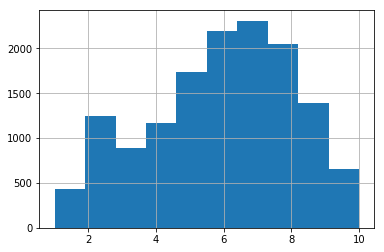

In [117]:
pd.Series(num_unique_sites).hist();

**Проверьте с помощью QQ-плота и критерия Шапиро-Уилка, что эта величина распределена нормально**

**<font color='red'> Вопрос 2. </font>Распределено ли нормально число уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов (согласно критерию Шапиро-Уилка)?**

In [153]:
''' ВАШ КОД ЗДЕСЬ '''
from scipy.stats import shapiro
foo = np.random.normal(size=1000)
print(len(num_unique_sites))
print(shapiro(num_unique_sites))
print(shapiro(foo))

(0.9546933174133301, 0.0)
(0.9984054565429688, 0.49441540241241455)


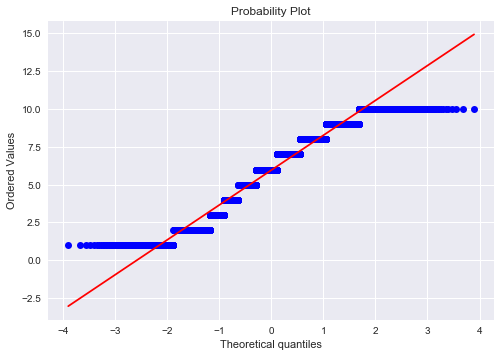

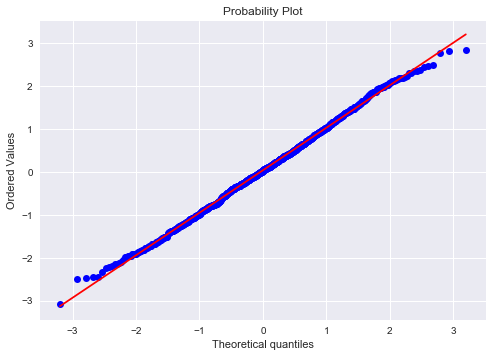

In [152]:
import scipy as sp
import pylab
import seaborn as sns
fig = plt.figure()
sp.stats.probplot(num_unique_sites, dist='norm', fit=True, rvalue=False, plot=pylab)
plt.show()

fig = plt.figure()
sp.stats.probplot(foo, dist='norm', fit=True, rvalue=False, plot=pylab)
plt.show()

**Проверьте гипотезу о том, что пользователь хотя бы раз зайдет на сайт, который он уже ранее посетил в сессии из 10 сайтов. Давайте проверим с помощью биномиального критерия для доли, что доля случаев, когда пользователь повторно посетил какой-то сайт (то есть число уникальных сайтов в сессии < 10) велика: больше 95% (обратите внимание, что альтернатива тому, что доля равна 95% –  одностороняя). Ответом на 3 вопрос в тесте будет полученное p-value.**

**<font color='red'> Вопрос 3. </font>Каково p-value при проверке описанной гипотезы?**

In [154]:
has_two_similar = (np.array(num_unique_sites) < 10).astype('int')

In [157]:
len(has_two_similar), sum(has_two_similar)

(14061, 13410)

In [171]:
''' ВАШ КОД ЗДЕСЬ '''
pi_val = stats.binom_test(sum(has_two_similar), len(has_two_similar), 0.95, 'greater')
print(pi_val)

0.0220765376907


**<font color='red'> Вопрос 4. </font>Каков 95% доверительный интервал Уилсона для доли случаев, когда пользователь повторно посетил какой-то сайт (из п. 3)?**

In [172]:
''' ВАШ КОД ЗДЕСЬ '''

from statsmodels.stats.proportion import proportion_confint
wilson_interval = proportion_confint(sum(has_two_similar), len(has_two_similar), method='wilson')

In [174]:
print('{} {}'.format(round(wilson_interval[0], 4),
                                   round(wilson_interval[1], 4)))

0.9501 0.9571


**Постройте распределение частоты посещения сайтов (сколько раз тот или иной сайт попадается в выборке) для сайтов, которые были посещены как минимум 1000 раз.**

In [246]:
np.sum(np.sum(train_df == 51))

7813

4913 25
[('s.youtube.com', (210, 8300)), ('www.google.fr', (51, 7813)), ('www.google.com', (4, 5441)), ('mail.google.com', (183, 4158)), ('www.facebook.com', (15, 4141)), ('apis.google.com', (52, 3758)), ('r3---sn-gxo5uxg-jqbe.googlevideo.com', (700, 3244)), ('r1---sn-gxo5uxg-jqbe.googlevideo.com', (214, 3094)), ('plus.google.com', (187, 2630)), ('accounts.google.com', (184, 2089))]


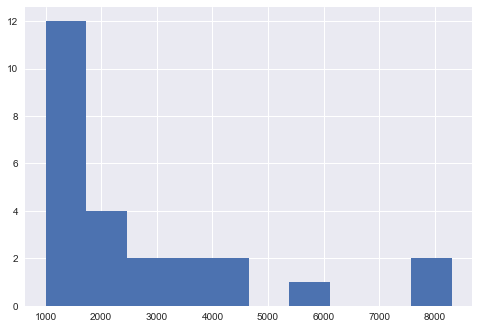

In [221]:
''' ВАШ КОД ЗДЕСЬ '''

with open(os.path.join(PATH_TO_DATA,'site_freq_10users.pkl'), 'rb') as fin:
    site_dict = pickle.load(fin)
site_freqs = np.array([v[1] for k, v in site_dict.items() if v[1] >= 0])
site_freqs_1000 = np.array([v[1] for k, v in site_dict.items() if v[1] >= 1000])
print(len(site_freqs), len(site_freqs_1000))
print(sorted(site_dict.items(), key=lambda x: -x[1][1])[:10])
plt.hist(site_freqs_1000, 10);
#plt.hist(site_freqs, 100);

In [199]:
''' ВАШ КОД ЗДЕСЬ '''

**Постройте 95% доверительный интервал для средней частоты появления сайта в выборке (во всей, уже не только для тех сайтов, что были посещены как минимум 1000 раз) на основе bootstrap. Используйте столько же bootstrap-подвыборок, сколько сайтов оказалось в исходной выборке по 10 пользователям. Берите подвыборки из посчитанного списка частот посещений сайтов – не надо заново считать эти частоты. Учтите, что частоту появления нуля (сайт с индексом 0 появлялся там, где сессии были короче 10 сайтов) включать не надо. Округлите границы интервала до 3 знаков после запятой и запишите через пробел в файл *answer2_5.txt*. Это будет ответом на 5 вопрос теста.**

**<font color='red'> Вопрос 5. </font>Каков 95% доверительный интервал для средней частоты появления сайта в выборке?**

In [256]:
def get_bootstrap_samples(data, n_samples, random_seed=17):
    np.random.seed(random_seed)
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [248]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, 
                 [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [266]:
''' ВАШ КОД ЗДЕСЬ '''
n_bootstrap = len(site_freqs)
res = np.zeros((1, 2))
for e in range(10):
    samples = get_bootstrap_samples(site_freqs, n_bootstrap, random_seed=e)
    print(stat_intervals([e.mean() for e in samples], 0.05))
    res += stat_intervals([e.mean() for e in samples], 0.05)
res /= 10

[ 22.61160187  35.69761856]
[ 22.35900672  35.60565846]
[ 22.51105231  35.89769998]
[ 22.57618563  35.6606554 ]
[ 22.5486668   35.97785467]
[ 22.32753918  35.72074089]
[ 22.39096275  35.76022797]
[ 22.52061877  35.6625687 ]
[ 22.65153674  35.78550784]
[ 22.45695095  35.69611235]


In [267]:
res

array([[ 22.49541217,  35.74646448]])

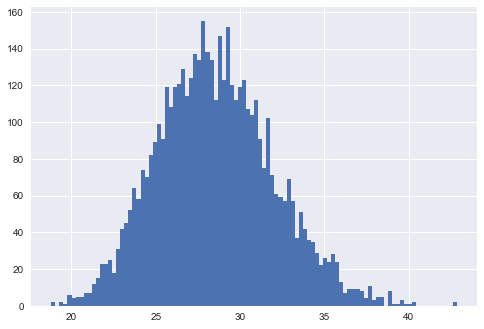

In [230]:
plt.hist([e.mean() for e in samples], 100);

На 3 неделе мы займемся визуальным анализом данных и построением признаков.